# How to use XSMILES

In [1]:
import xsmiles
import json # currently XSMILES widget only accepts the python dict in json-text format

In [2]:
print("XSMILES-JupyterLab version:", xsmiles.__version__) 

XSMILES-JupyterLab version: 0.2.2


# Atom and Non-atom attributions - defining a simple and small molecule

If you want to use default settings, the minimum input is exemplified below. It is formed by a `string`, `methods` and `attributes`.

Note that `method 1` contains only 4 attributions (atom attributions) while `method 2` contains one attribution per SMILES token (atom and non-atom tokens).
The scores vector must match the number of atoms in the molecule or the number of SMILES tokens. Non-atom attributions are set to 0.0 if they are not defined in the scores vector.

The default setting calculates the `colorDomain` based on the maximum absolute value from scores: [-max_abs, 0, max_abs].

In the example below, the different ranges `[-0.5, 0, 0.5]` and `[-0.3, 0, 0.3]` from each visualization happens because it considers the scores from each method separately.

Note that you may enter attributes on the "molecule" and "method" levels.

In [3]:
small_molecule = {
        'string': "CN=C=O",
        'methods': [
            { 'name': "method 1", 'scores': [0.0, 0.25, 0.0, -0.5], 'attributes':{'Pred.':0.55} }, # scores.length == N of atom characters (here, CNCO)
            { 'name': "method 2", 'scores': [0.05, 0.25, 0.3, 0.15, -0.15, -0.3],'attributes':{'Pred.':0.66} }, # scores.length == string.length
        ],
        'attributes': {"Truth": 0.6} # 'attributes' is mandatory in the current version. Please use an empty object if you won't add attributes: 'attributes':{}
    }

xsmiles.XSmilesWidget(molecules=json.dumps([small_molecule])) # create xsmiles object


XSmilesWidget(molecules='[{"string": "CN=C=O", "methods": [{"name": "method 1", "scores": [0.0, 0.25, 0.0, -0.…

# Data structure

In the code bellow you find additional information about the data format.

In [4]:
molecule = {
          # the smiles string - (RDKit canonical)
          'string': 'CCCCCCCC(=O)Oc1c(Br)cc(C#N)cc1Br',                   
          
          # Optional sequence, in case the app cannot parse your string correctly you can try and split it and input together with the original string
          #'sequence': ["C","C", "C", "C", "C", "C", "C", "C", "(", "=", "O", ")", "O", "c", "1", "c", "(", "Br", ")", "c", "c", "(", "C", "#", "N", ")", "c", "c","1", "Br" ],
    
          # The name of your scores's method and the scored themselves. They should have the size of sequence. 
          # If sequence is not provided, it will automatically create 'sequence' and compare with the size of scores.
          # If they are not matching, try to provide the sequence vector manually, and a scores vector with the same size.
          'methods': [{
            'name': 'My XAI Method',
            'scores': [
              -0.1762678623199463, -0.25460100173950195, -0.2712419033050537,
              -0.2308177947998047, -0.12025833129882812, -0.13311767578125,
              -0.16690635681152344, -0.27755022048950195, -0.38324832916259766,
              -0.2450413703918457, -0.3898346424102783, -0.22409844398498535,
              -0.2113962173461914, -0.12725472450256348, -0.04010510444641113,
              -0.01143336296081543, -0.05576324462890625, 0.18838262557983398,
              0.0361400842666626, 0.0019290447235107422, 0.0008728504180908203,
              -0.028931856155395508, 0.05310940742492676, 0.35703766345977783,
              -0.16322708129882812, 0.07348740100860596, -0.037914276123046875,
              0.0180361270904541, -0.047339677810668945, 0.06556379795074463,
            ],
          }],
          # Custom attributes to be displayed under the graphic
          # Currently it is mandatory, but you can use 'attributes': {}, if you don't have any attributes.
          'attributes': {
            'predicted': 5.300230503082275,          
            'measured': 3.284126043319702,
            'Compound ID': 'bromoxynil octanoate',
          },
        }


# Set up the input: always a vector of 1 or more molecules
molecules = [molecule]

# Currently XSMILES widget only accepts the python dict in json-text format. 
# Use json.dumps():
xsmiles.XSmilesWidget(molecules=json.dumps(molecules))


XSmilesWidget(molecules='[{"string": "CCCCCCCC(=O)Oc1c(Br)cc(C#N)cc1Br", "methods": [{"name": "My XAI Method",…

# Optional sequence

Here we add the `sequence`. If sequence is provided, it won't parse the `string` to find the atoms/non-atoms SMILES tokens.
This may help if the parser can't parse your SMILES string correctly.

In [5]:
molecule_with_sequence = {          
          'string': 'CCCCCCCC(=O)Oc1c(Br)cc(C#N)cc1Br',
          
          # Optional sequence, in case the app cannot parse your string correctly you can try and split it and input together with the original string
          'sequence': ["C","C", "C", "C", "C", "C", "C", "C", "(", "=", "O", ")", "O", "c", "1", "c", "(", "Br", ")", "c", "c", "(", "C", "#", "N", ")", "c", "c","1", "Br" ],
        
          'methods': [{
            'name': 'logBCF perturb',
            'scores': [
              -0.1762678623199463, -0.25460100173950195, -0.2712419033050537,
              -0.2308177947998047, -0.12025833129882812, -0.13311767578125,
              -0.16690635681152344, -0.27755022048950195, -0.38324832916259766,
              -0.2450413703918457, -0.3898346424102783, -0.22409844398498535,
              -0.2113962173461914, -0.12725472450256348, -0.04010510444641113,
              -0.01143336296081543, -0.05576324462890625, 0.18838262557983398,
              0.0361400842666626, 0.0019290447235107422, 0.0008728504180908203,
              -0.028931856155395508, 0.05310940742492676, 0.35703766345977783,
              -0.16322708129882812, 0.07348740100860596, -0.037914276123046875,
              0.0180361270904541, -0.047339677810668945, 0.06556379795074463,
            ],
          }],
          'attributes': {
            'predicted': 5.300230503082275,          
            'measured': 3.284126043319702,
            'Compound ID': 'bromoxynil octanoate',
          },
        }

xsmiles.XSmilesWidget(molecules=json.dumps([molecule_with_sequence]))


XSmilesWidget(molecules='[{"string": "CCCCCCCC(=O)Oc1c(Br)cc(C#N)cc1Br", "sequence": ["C", "C", "C", "C", "C",…

# Changing colors

Use `view_config` to define if you want to show the bar chart or the attributes, and to define if you want the structure from RDKit to be colored or in black.



In [6]:
view_config = {
    'hideBarChart': False,
    'hideAttributesTable': True, 
    'drawerType': 'RDKitDrawer', # Possible values RDKitDrawer (colored) or RDKitDrawer_black (black).    
}


Use `gradient_config` to change properties of the heatmap. The attributes `colorDomain` and `palette` affect the bar chart too.

In [7]:
molecules = [molecule]

# Colors and heatmap configuration
gradient_config = {     
        # The available colors are intended to be colorblind friendly, but due to interpolation this may not always be the case. Please test your figures.        
        # Available colors: name_N and name_N_reverse, for:
        # name =  "BrBG", "PiYG", "PRGn", "PuOr", and "RdBu"; 
        # N = 3, 5, 7 and 9;        
        # e.g. PRGn_5, PRGn_5_reverse,     
        # TIP: in the demonstration website, mouse-over palettes will show their names.
        # TIP2: if you want to give more importance to attributions close to 0.0, use N = 9 (or bigger, see section: "Your custom palette").
        # Extra Bayer palettes, based on Bayer's color Identity: BayerBlRdN, BayerBlGrN, and BayerRdGrN; and their *_reverse, and their *BrightN:
        #    e.g. BayerRdGr5_reverse, BayerRdGrBright5, BayerRdGrBright5_reverse
        'palette': 'PiYG_5', # default: PiYG_5. 
       
        # Recommended: [0.25], [0.5], [0.75]; other possibilities [0.25, 0.5], [0.5, 0.75], [0.25, 0.75], [0.25, 0.5, 0.75] and so on
        'thresholds': [], #default []
    
        # Used to 'super' highlight what is above/below certain values.
        # It must be always in the [negative, 0, positive], e.g. [-0.2, 0, 0.5], but we recommend "mirroed" values, e.g., [-0.2, 0, 0.2] instead.
        # These are the lower and upper vaues for the "domain" that is considered when mapping colors and sizing the bar chart.
        # If a score has value 1.5 and threshols are [-1, 0, 1], it will have the effect of a score 1.0.
        # in the same range, a score 0.9 will have the effect of a score 0.9.
        # This means the widget won't scale the scores... but consider what is below or upper a certain maximum equals to the colorDomain min/max.
        # In the range [-1, 0, 1], scores like 1.5, 2.5, 3.0 will be represented by the same color and same-sized bars in the barchart.
        'colorDomain': [-0.25, 0, 0.25],  #default: [-1,0,1]
        
        'radius': {'min': 15, 'max': 100},  #default: {'min': 15, 'max': 40}
        'opacity': {'min': 0, 'max': 1}, #default: {'min': 0.6, 'max': 1} 
        'blur': 0.8, #default: 0.7
      }

# Currently XSMILES widget only accepts the python dict in json-text format. 
# Use json.dumps() as here:
xsmiles.XSmilesWidget(molecules=json.dumps(molecules), gradient_config=json.dumps(gradient_config), view_config=json.dumps(view_config) )

XSmilesWidget(gradient_config='{"palette": "PiYG_5", "thresholds": [], "colorDomain": [-0.25, 0, 0.25], "radiu…

## Your custom palette

You can define your own palette.

Don't forget to check if your colors are considered ok in terms of **colorblindness**! Search for "**online colorblind simulator**" if you are not sure about your custom palette.

Note that your color palette will be transformed with Benzir interpolation and corrected for brightness.

So even when we use a crazy rainbow colormap, it won't look too crazy because the colors are transformed.

Therefore, your palettes should go from stronger values (darker hues) from both right and left sides to lighter values in the middle. In other words, your palette should have only 2 main colors, one for + and one for - attributions.

It should also have an odd total number of colors. E.g. [4 blues, 1 white (middle), 4 reds] = total 5 colors.

The more colors it has, the smaller is the "range" that will be colored in light-gray.

That means that if you want to give more significance to attributions close to 0.0, you need to use more colors in your palette.

*The mid color will be replaced with light gray.*

In [8]:
# Colors and heatmap configuration
gradient_config = {         
        'palette': { 
                'name': 'My simple pink-green palette', 
                'colors':['#f605bd',    '#mid-color-is-not-used',    '#219b15'] 
        }
      }

xsmiles.XSmilesWidget(molecules=json.dumps(molecules), gradient_config=json.dumps(gradient_config), view_config=json.dumps(view_config) )

XSmilesWidget(gradient_config='{"palette": {"name": "My simple pink-green palette", "colors": ["#f605bd", "#mi…

## Comparing with RDKit

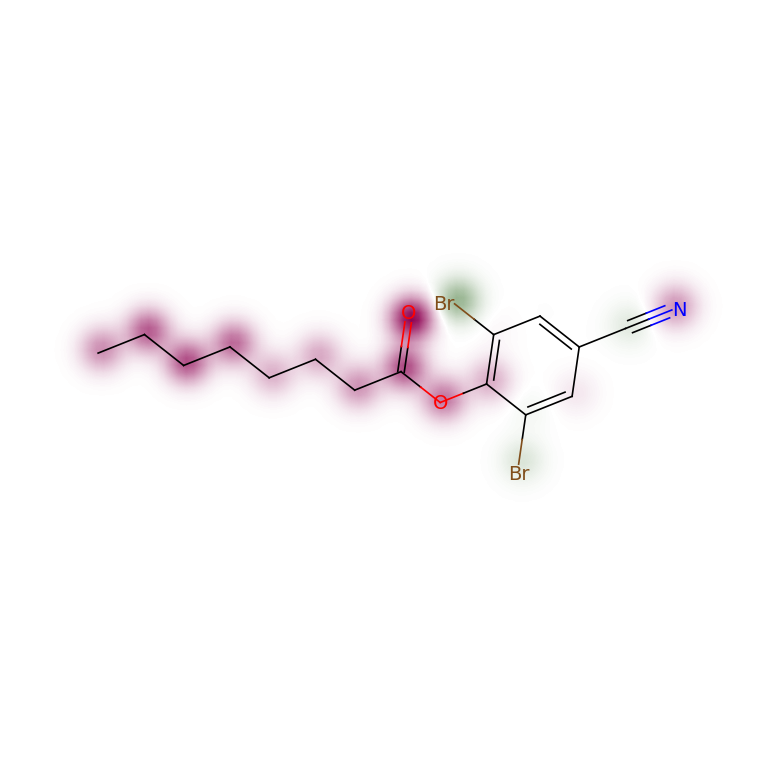

In [9]:
compare_with_rdkit = True #use false if you don't have it installed or don't want to
if compare_with_rdkit:
    import rdkit # make sure you have RDKit installed to run this notebook: pip install rdkit-pypi
    from rdkit.Chem.Draw import SimilarityMaps
    from io import BytesIO
    from PIL import Image

    def draw(mol, width=250, d = None):            
        d.FinishDrawing()    
        stream = BytesIO(d.GetDrawingText())
        return Image.open(stream)

    mol = rdkit.Chem.MolFromSmiles(molecule_with_sequence['string'])
    smiles_scores = molecule_with_sequence['methods'][0]['scores']
    smiles_sequence = molecule_with_sequence['sequence']
    scores = [smiles_scores[i] for i in range(len(smiles_scores)) if smiles_sequence[i] in ["C","O","c","Br","N"]]  #CCCCCCCC(=O)Oc1c(Br)cc(C#N)cc1Br
    width = 300

    #GetSimilarityMapFromWeights(mol, weights, colorMap=None, scale=- 1, size=250, 250, sigma=None, coordScale=1.5, step=0.01, colors='k', contourLines=10, alpha=0.5, draw2d=None, **kwargs)¶
    fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, scores, size=(width,width), contourLines=0, scale=-1)

### Reverse palette

In [10]:
# Colors and heatmap configuration
gradient_config = {        
        'palette': 'PiYG_5_reverse',     # <palette>_reverse  
        'thresholds': [0.5],             # highlight with white what is above 50% from max color domain
        'colorDomain': [-0.5, 0, 0.5], 
        'radius': {"min":20, "max":40}
      }

xsmiles.XSmilesWidget(molecules=json.dumps(molecules), gradient_config=json.dumps(gradient_config))

XSmilesWidget(gradient_config='{"palette": "PiYG_5_reverse", "thresholds": [0.5], "colorDomain": [-0.5, 0, 0.5…

# Hiding bar chart and attributes

You can hide the bar chart and attributes table using the `hideBarChart` and `hideAttributesTable` options. from `view_config`.

The `drawerType` will define if the structure will be colored by atom or all in black.


In [11]:
view_config = {
    'hideBarChart':True,
    'hideAttributesTable': True, 
    'drawerType': 'RDKitDrawer' # Possible values RDKitDrawer (can be difficult to read) or RDKitDrawer_black (recommended). Outdated options: smilesDrawer and smilesDrawer_black
}

# Currently XSMILES widget only accepts the python dict in json-text format. 
# Use json.dumps() as here:
xsmiles.XSmilesWidget(molecules=json.dumps(molecules), gradient_config=json.dumps(gradient_config), view_config=json.dumps(view_config) )


XSmilesWidget(gradient_config='{"palette": "PiYG_5_reverse", "thresholds": [0.5], "colorDomain": [-0.5, 0, 0.5…

## Showing attributions labels on the molecule diagram

In [12]:

view_config = {
    'hideBarChart':True,
    'hideAttributesTable': True, 
    'showScoresOnStructure':True
}

# Currently XSMILES widget only accepts the python dict in json-text format. 
# Use json.dumps() as here:
xsmiles.XSmilesWidget(molecules=json.dumps(molecules), gradient_config=json.dumps(gradient_config), view_config=json.dumps(view_config) )

XSmilesWidget(gradient_config='{"palette": "PiYG_5_reverse", "thresholds": [0.5], "colorDomain": [-0.5, 0, 0.5…

# Multiple molecules

You can define a vector of single molecules with 1 attribution vector or a vector of molecules with multiple attribution vectors.

In the following example, `molecule` is the first case. They could be different molecules. The molecules will arrange in the available space.

The second case is exemplified in `small_molecule`, where we have one molecule and 2 attributions vectors.

In [13]:
# Multiple molecules:
molecules = [small_molecule, molecule, molecule]

# changes palette
gradient_config["palette"] = "PuOr_3_reverse"

xsmiles.XSmilesWidget(molecules=json.dumps(molecules), gradient_config=json.dumps(gradient_config))


XSmilesWidget(gradient_config='{"palette": "PuOr_3_reverse", "thresholds": [0.5], "colorDomain": [-0.5, 0, 0.5…

## Loading molecules from a file

There is no native feature to save or load molecules from files. You may simply save them into JSON files and reload in any notebook.

If you want to see an example, please check the **Use Case 2** from our article.

We prepared a Jupyter Notebook where we generate attributions and save them into a JSON file.

In the end of the notebook we load this file and visualize its molecules using XSMILES.